
## Bayesian Linear Regression 2
Ilyas Ustun

In [14]:
import warnings

import arviz as az
import matplotlib.pyplot as plt
import numpy as np
import pymc3 as pm
import theano.tensor as tt
import pandas as pd

warnings.simplefilter(action="ignore", category=FutureWarning)

%config InlineBackend.figure_format = 'retina'
az.style.use("arviz-darkgrid")
print(f"Running on PyMC3 v{pm.__version__}")
print(f"Running on ArviZ v{az.__version__}")


Running on PyMC3 v3.11.1
Running on ArviZ v0.11.2



### Generate data

We are creating a regression line defined by intercept and slope and add data points by sampling from a Normal with the mean set to the regression line.

In [2]:
size = 200
true_intercept = 1
true_slope = 2

x = np.linspace(0, 1, size)
# y = a + b*x
true_regression_line = true_intercept + true_slope * x
# add noise
y = true_regression_line + np.random.normal(scale=.5, size=size)

data = dict(x=x, y=y)

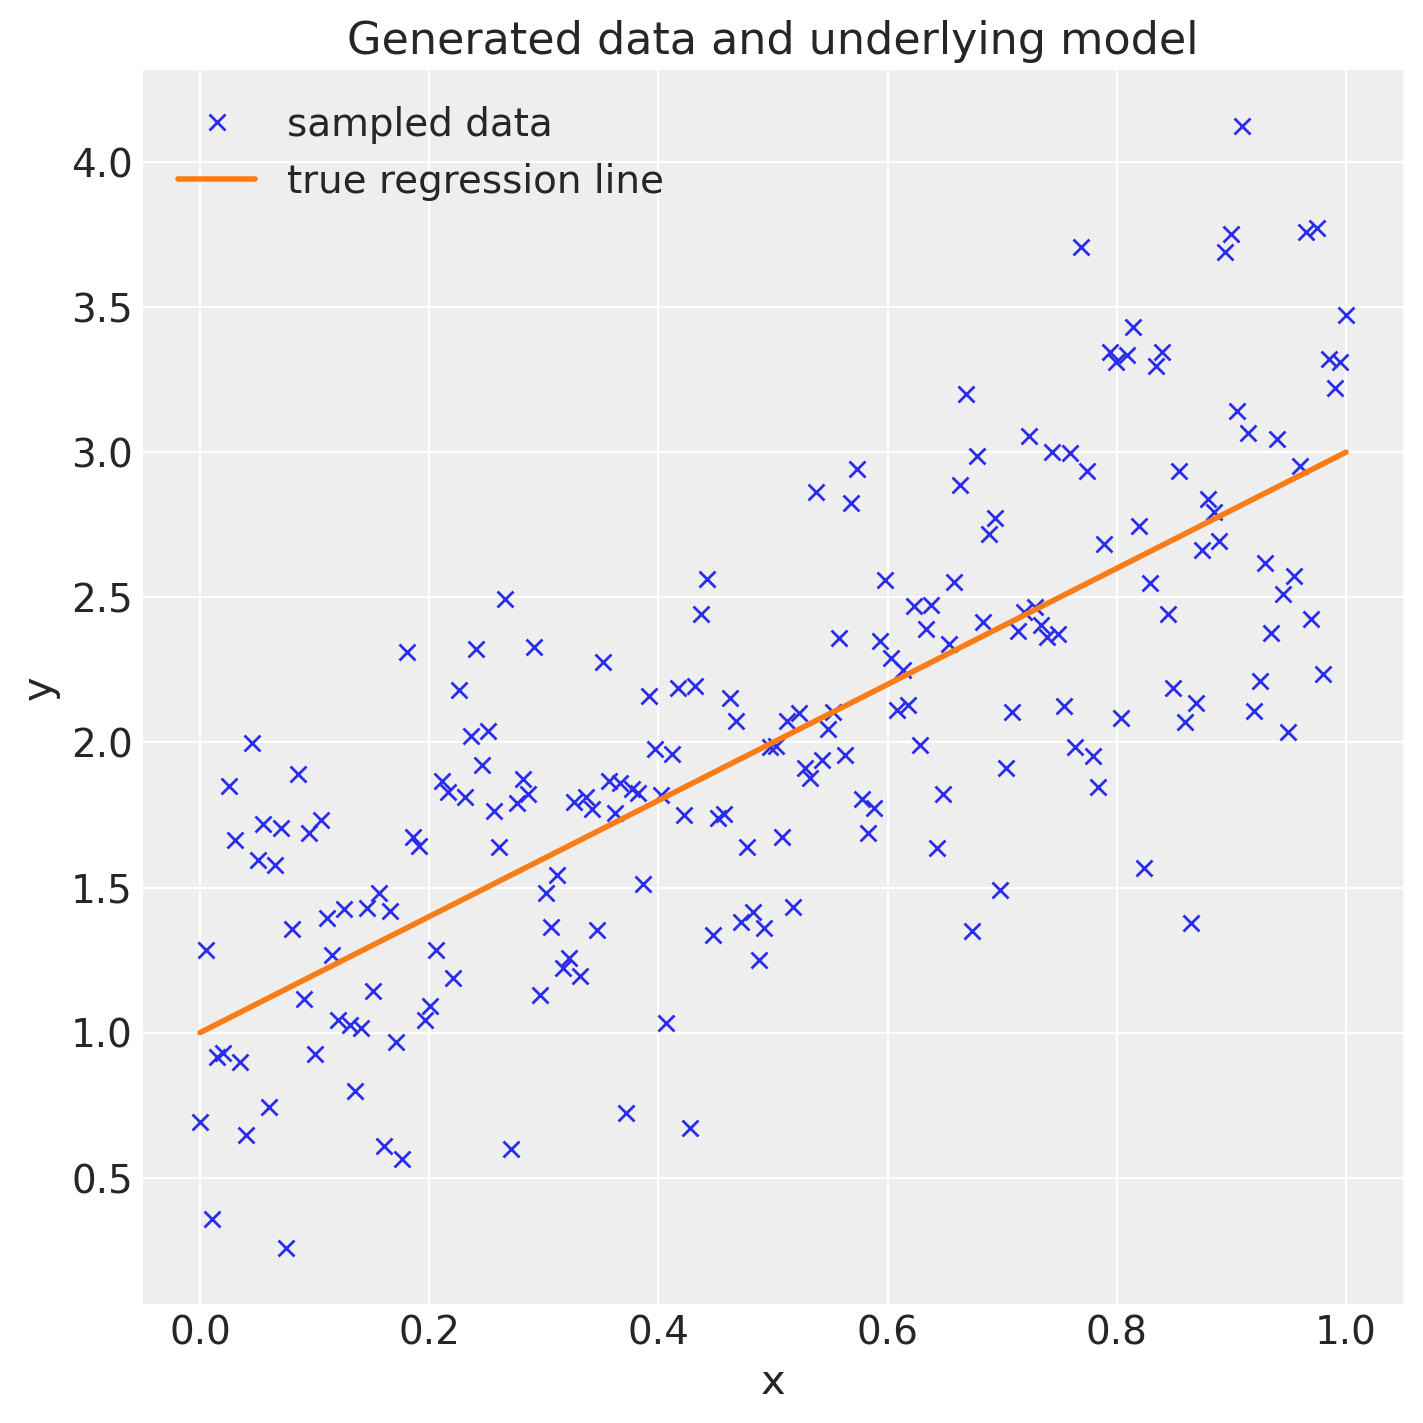

In [3]:
fig = plt.figure(figsize=(7, 7))
ax = fig.add_subplot(111, xlabel='x', ylabel='y', title='Generated data and underlying model')
ax.plot(x, y, 'x', label='sampled data')
ax.plot(x, true_regression_line, label='true regression line', lw=2.)
plt.legend(loc=0);

### Build Model

In [5]:
with pm.Model() as model:
    # specify glm and pass in data. The resulting linear model, its likelihood and
    # and all its parameters are automatically added to our model.
    pm.glm.GLM.from_formula(formula='y ~ x', data=data)
    trace = pm.sample(draws=1000, cores=4) # draw 1000 posterior samples using NUTS sampling

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [sd, x, Intercept]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 21 seconds.


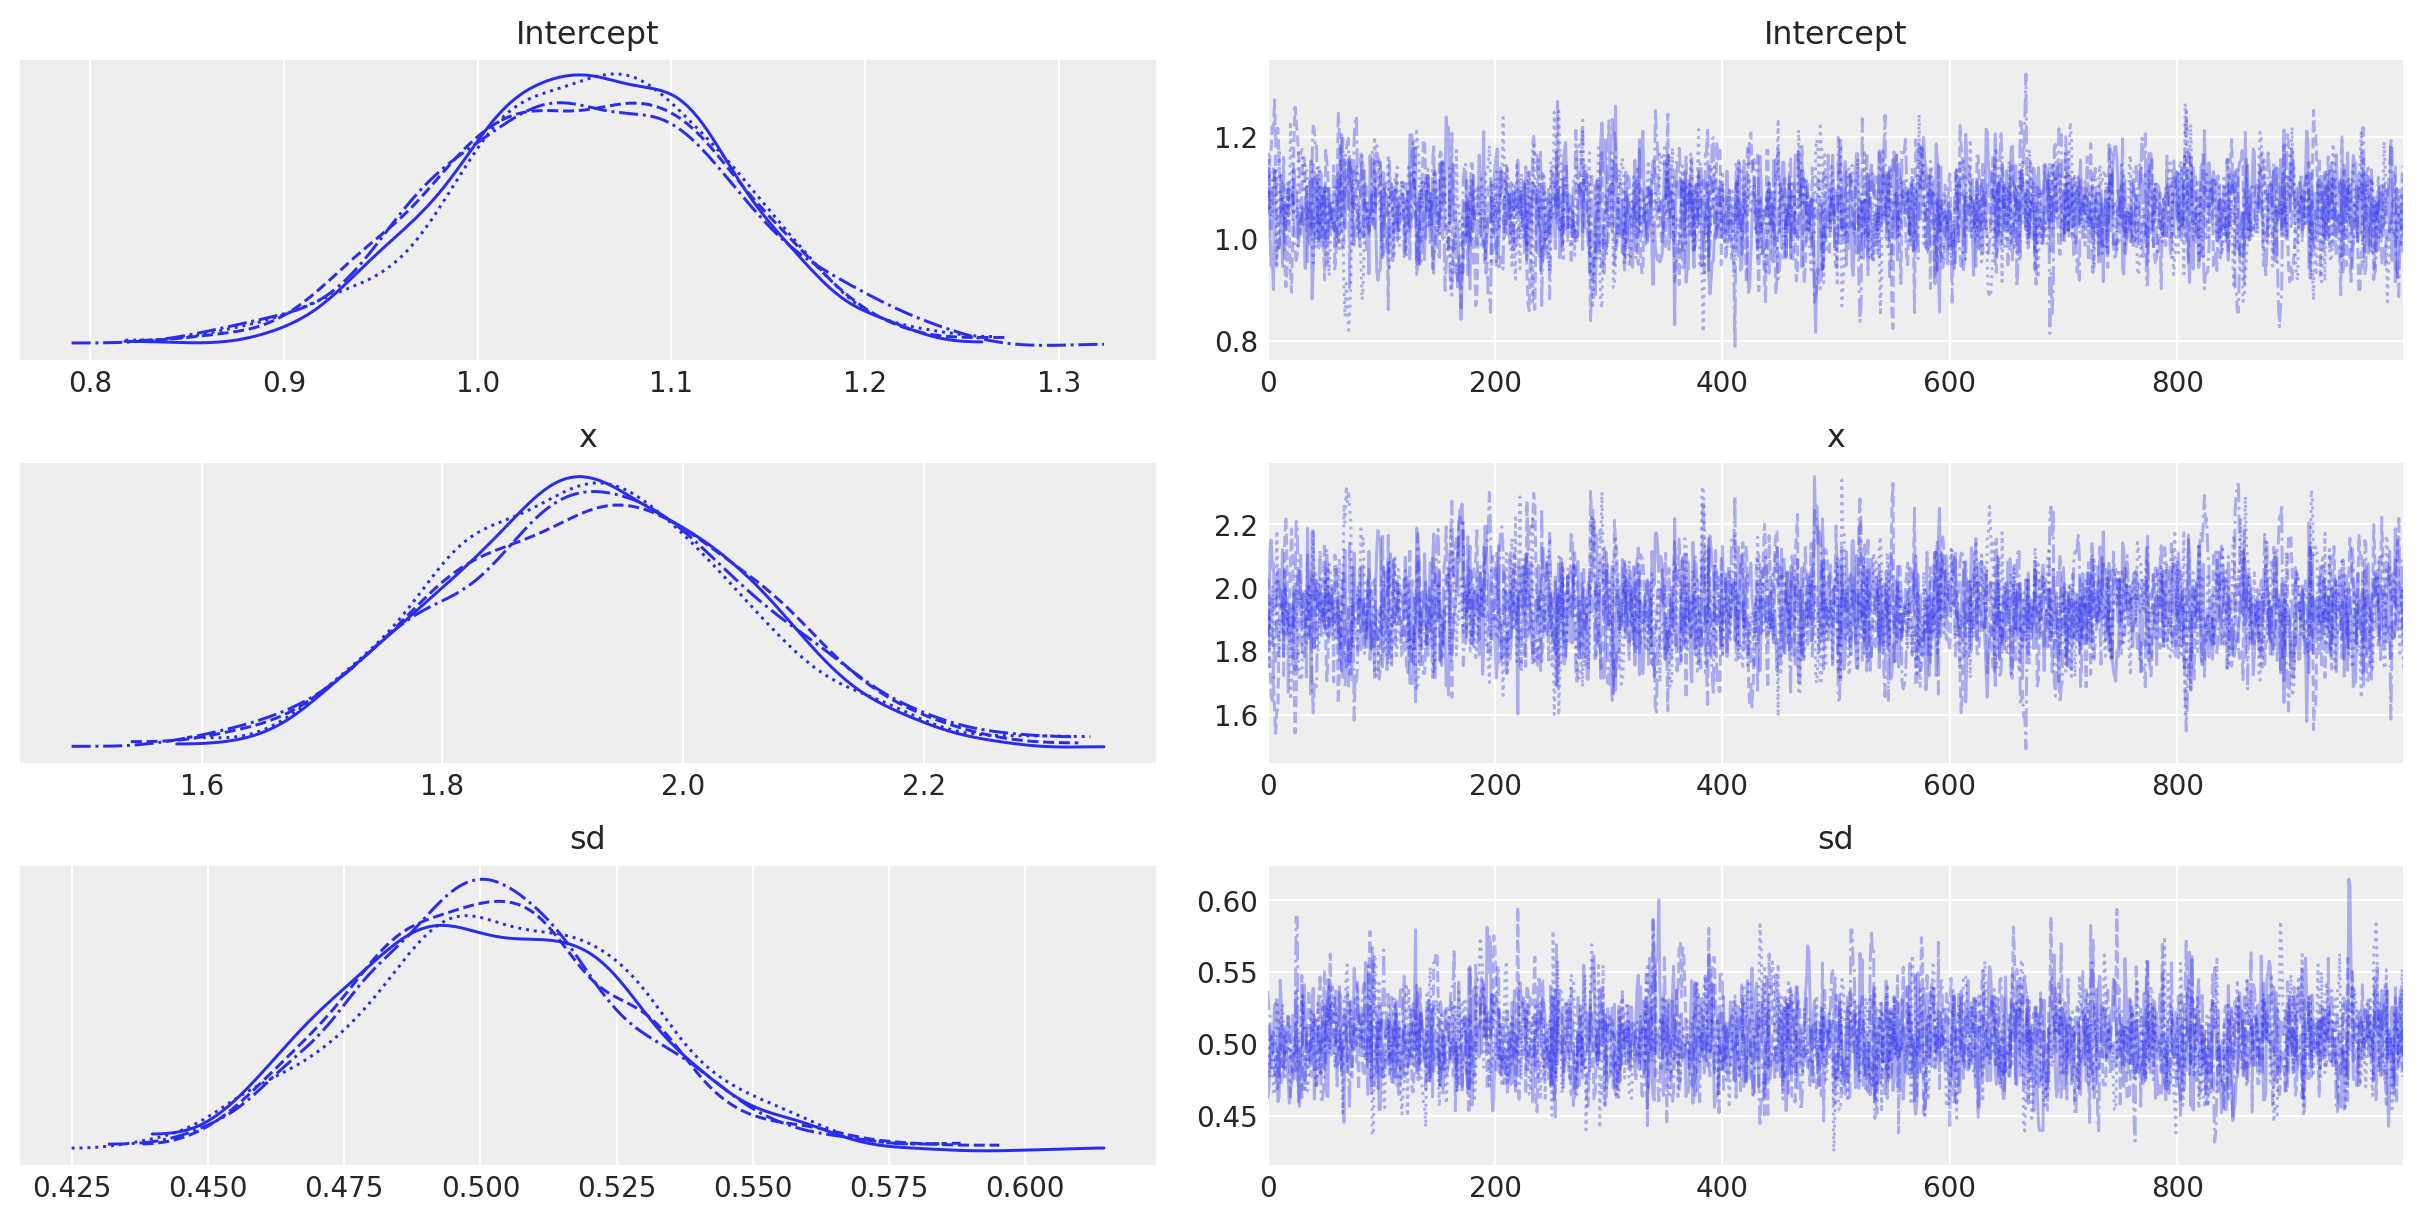

In [7]:
with model:
    az.plot_trace(trace);

### Observations

- The left side shows our marginal posterior – for each parameter value on the x-axis we get a probability on the y-axis that tells us how likely that parameter value is.

- Firstly, our sampling chains for the individual parameters (left side) seem well converged and stationary (there are no large drifts or other odd patterns).

- Secondly, the maximum posterior estimate of each variable (the peak in the left side distributions) is very close to the true parameters used to generate the data (x is the regression coefficient and sigma is the standard deviation of our normal).

### Plot Regression Line

In the GLM we thus do not only have one best fitting regression line, but many. A posterior predictive plot takes multiple samples from the posterior (intercepts and slopes) and plots a regression line for each of them. Here we are using the `plot_posterior_predictive_glm()` convenience function for this.

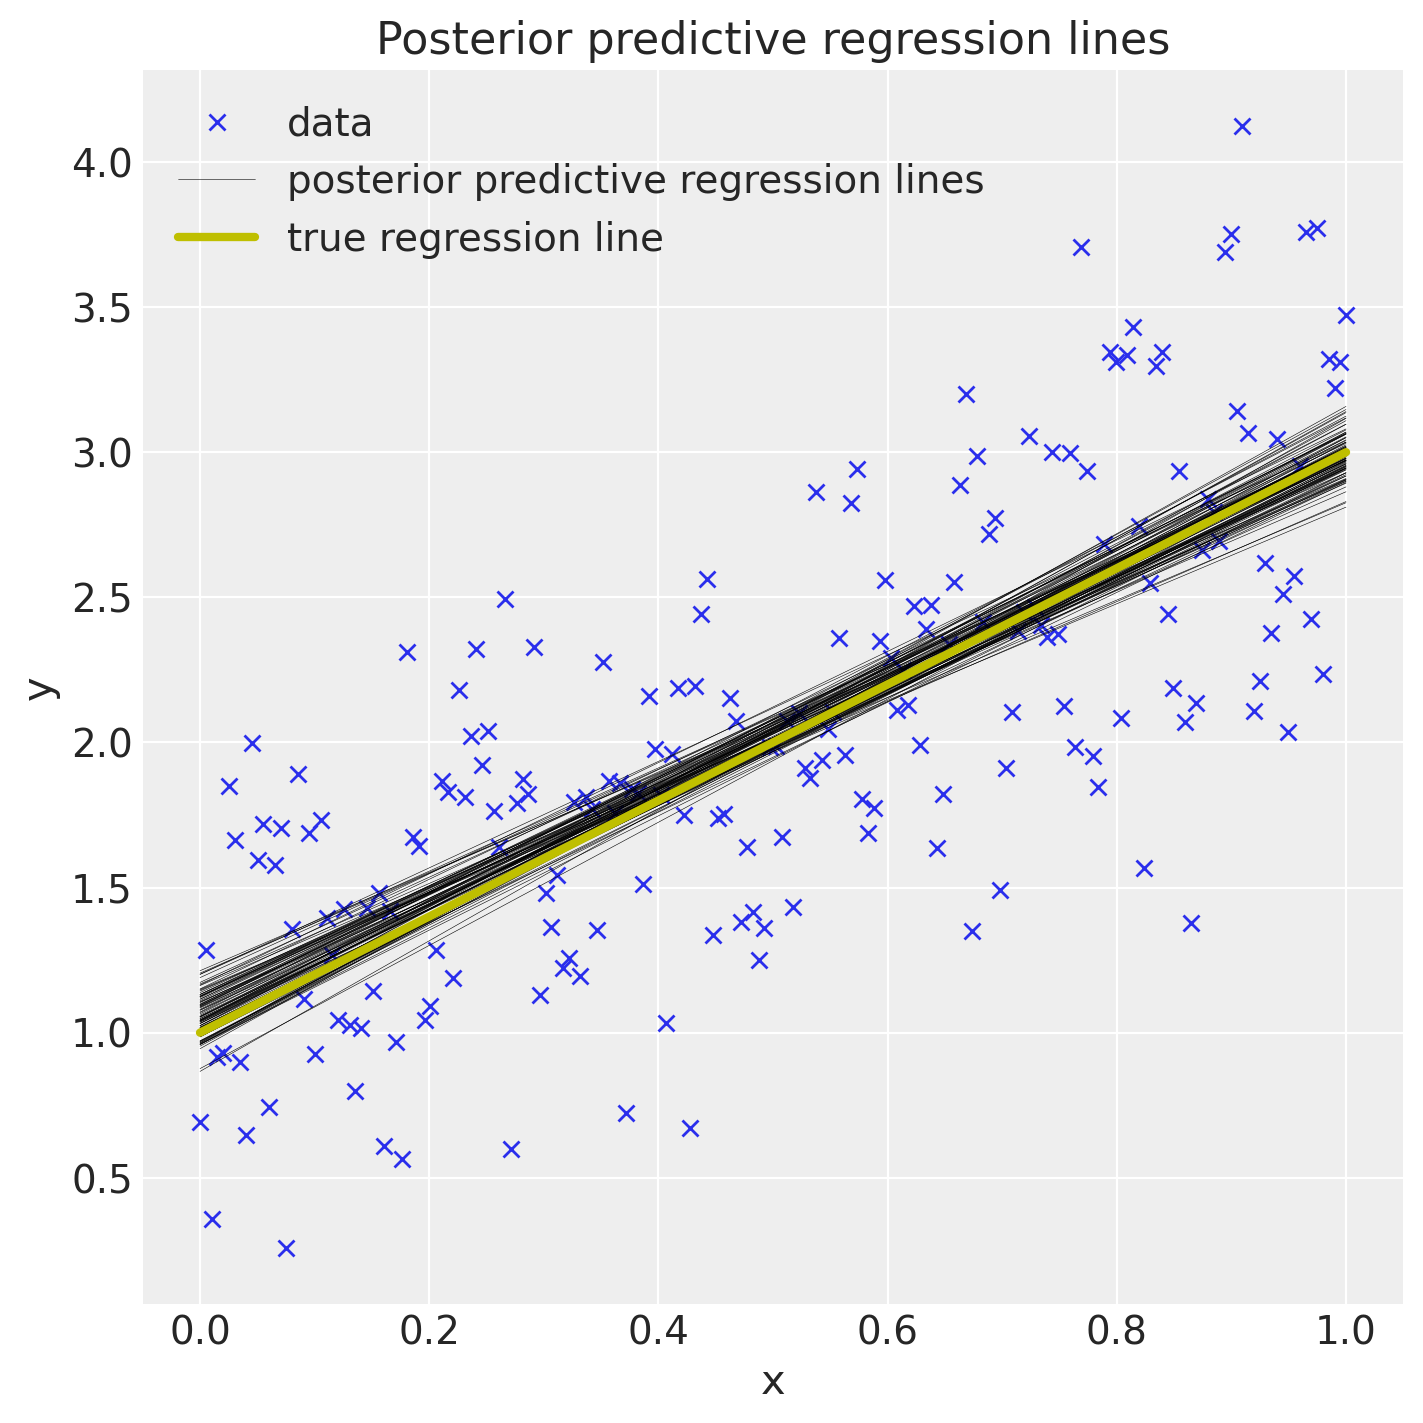

In [8]:
plt.figure(figsize=(7, 7))
plt.plot(x, y, 'x', label='data')
pm.plot_posterior_predictive_glm(trace, samples=100,
                              label='posterior predictive regression lines')
plt.plot(x, true_regression_line, label='true regression line', lw=3., c='y')

plt.title('Posterior predictive regression lines')
plt.legend(loc=0)
plt.xlabel('x')
plt.ylabel('y');

As you can see, our estimated regression lines are very similar to the true regression line. But since we only have limited data we have uncertainty in our estimates, here expressed by the variability of the lines.

In [10]:
predictions = pm.sample_posterior_predictive(trace, model=model)

In [34]:
predictions = pm.sample_posterior_predictive(trace[600:], model=model)

In [35]:
predictions

{'y': array([[ 0.69224118,  0.05600232,  1.12261002, ...,  3.02028402,
          2.98334675,  1.38426234],
        [ 1.3145041 , -0.15650749,  0.67637781, ...,  3.22480679,
          1.84771904,  2.55439994],
        [ 0.76780833,  1.4629138 ,  1.36868683, ...,  1.81554513,
          3.4714458 ,  3.59618587],
        ...,
        [ 1.26086369,  1.15404646,  1.35986343, ...,  2.95824762,
          3.37860344,  2.85856731],
        [ 1.18042515,  0.24055461,  1.81773266, ...,  2.80846238,
          2.95922932,  3.27829381],
        [ 1.36704024,  0.28410582,  0.62901264, ...,  3.34313959,
          2.87608233,  2.50007747]])}

In [39]:
predictions['y'][0].shape

(200,)

In [40]:
predictions['y']

array([[ 0.69224118,  0.05600232,  1.12261002, ...,  3.02028402,
         2.98334675,  1.38426234],
       [ 1.3145041 , -0.15650749,  0.67637781, ...,  3.22480679,
         1.84771904,  2.55439994],
       [ 0.76780833,  1.4629138 ,  1.36868683, ...,  1.81554513,
         3.4714458 ,  3.59618587],
       ...,
       [ 1.26086369,  1.15404646,  1.35986343, ...,  2.95824762,
         3.37860344,  2.85856731],
       [ 1.18042515,  0.24055461,  1.81773266, ...,  2.80846238,
         2.95922932,  3.27829381],
       [ 1.36704024,  0.28410582,  0.62901264, ...,  3.34313959,
         2.87608233,  2.50007747]])

In [47]:
predictions['y'].mean(axis=0)

array([1.06049875, 1.08512633, 1.05114084, 1.1006336 , 1.10106768,
       1.11443771, 1.11653898, 1.1319689 , 1.12035458, 1.16050843,
       1.14681809, 1.16580665, 1.18343207, 1.20802069, 1.20260947,
       1.19750327, 1.19709765, 1.21255591, 1.21767884, 1.24571666,
       1.25513492, 1.25984494, 1.26486963, 1.27362824, 1.26532501,
       1.32011393, 1.31186836, 1.30988652, 1.33848471, 1.34031044,
       1.36145651, 1.38615594, 1.35164403, 1.38437439, 1.35779341,
       1.38316811, 1.38651692, 1.4074293 , 1.41783615, 1.4482854 ,
       1.43402412, 1.44666773, 1.46469127, 1.48217564, 1.49415175,
       1.47925613, 1.51591698, 1.52555731, 1.51377723, 1.53548864,
       1.5486477 , 1.54163917, 1.56654482, 1.58093835, 1.57395939,
       1.60015381, 1.61371402, 1.62123915, 1.6052157 , 1.61599666,
       1.63179349, 1.6541368 , 1.65420456, 1.65442559, 1.67580005,
       1.66748823, 1.70727162, 1.70320863, 1.73212885, 1.71349193,
       1.75339307, 1.75148569, 1.71694395, 1.742595  , 1.77662

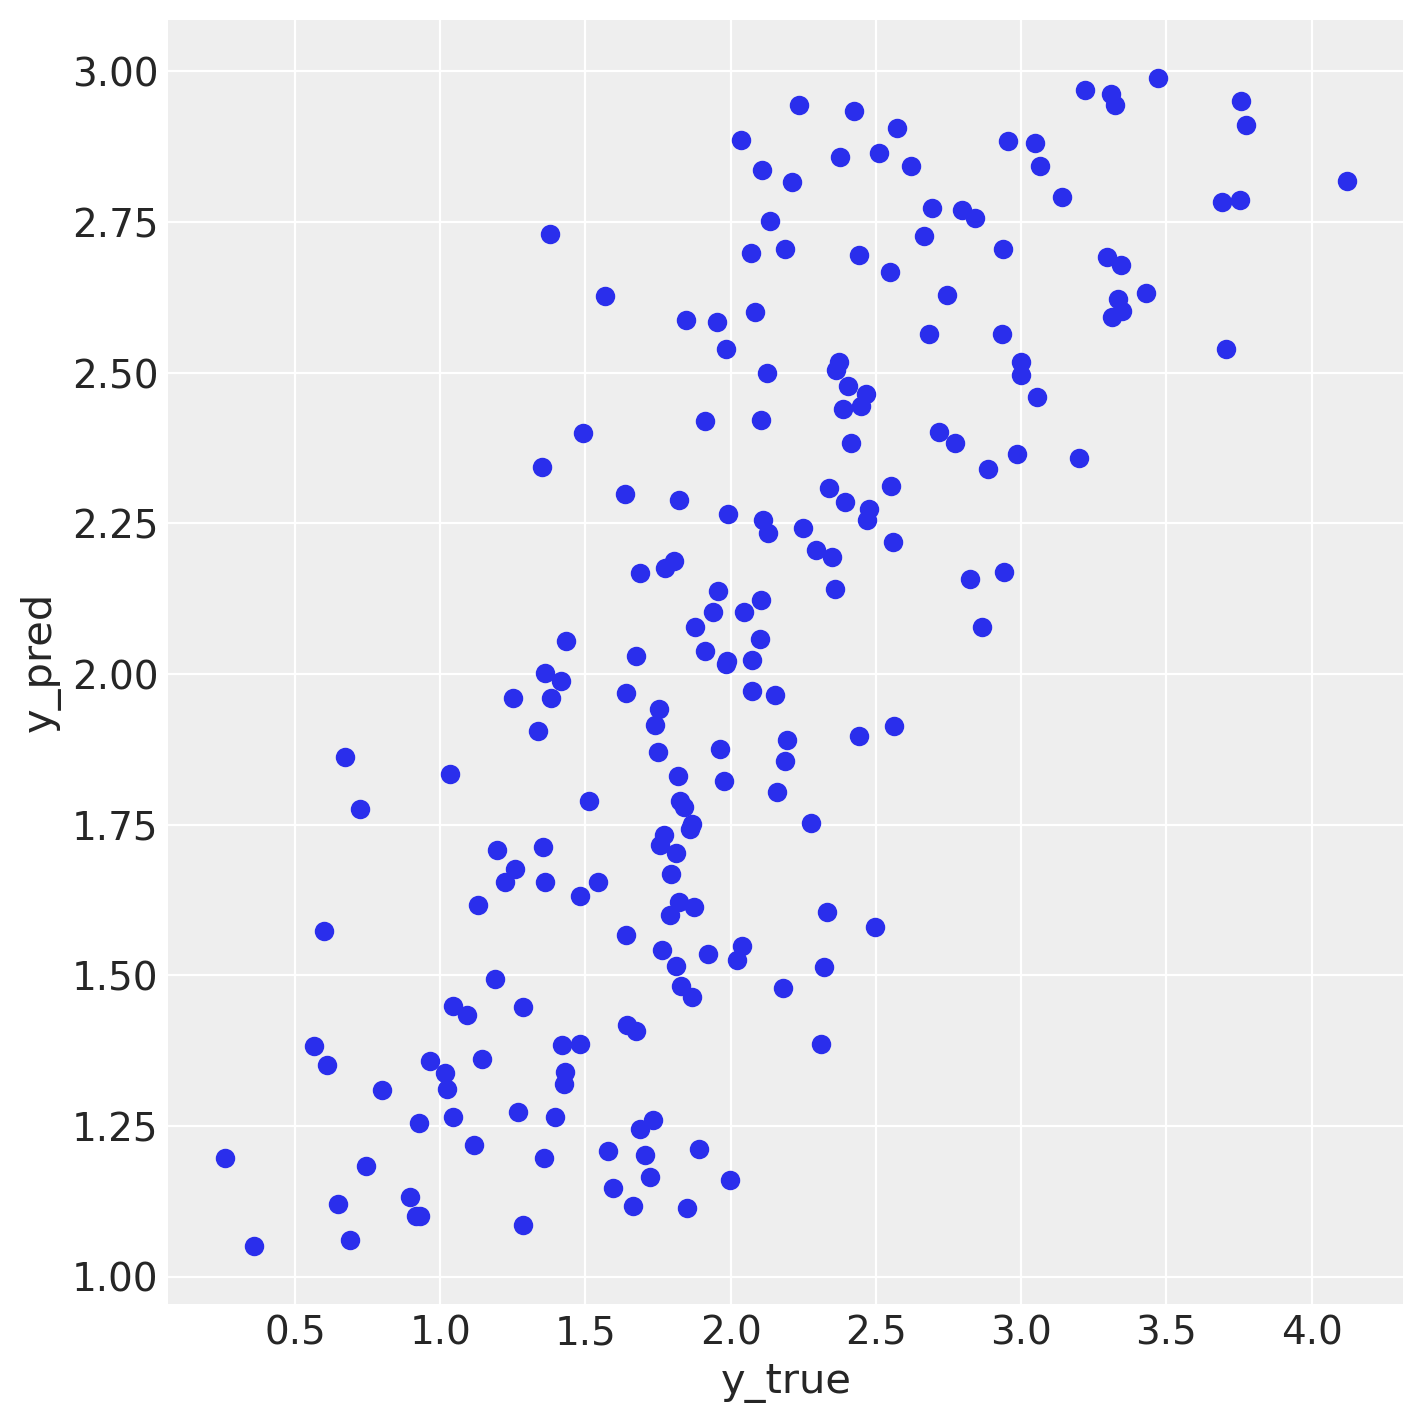

In [49]:
plt.figure(figsize=(7, 7))
plt.plot(y, predictions['y'].mean(axis=0), 'o', label='data')
plt.xlabel('y_true')
plt.ylabel('y_pred');

Adapted and improved from: 
- https://twiecki.io/blog/2013/08/12/bayesian-glms-1/  
- https://docs.pymc.io/notebooks/GLM-linear.html